In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
dm = pd.read_csv("C:/Users/sansk/Downloads/50_Startups.csv")
dm

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


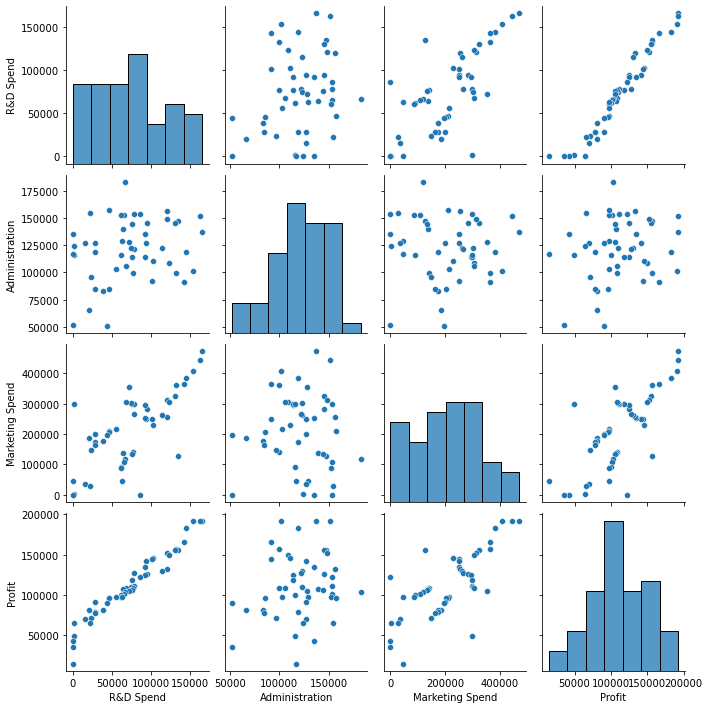

In [4]:
sns.pairplot(dm)

In [5]:
dm.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# data cleaning

In [6]:
dm.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df = dm.rename({'R&D Spend':'RD', 'Administration':'AD' , 'Marketing Spend':'MD'},axis = 1)
df

,RD,AD,MD,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [71]:
data = df.Profit


#  model Bulding

In [8]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+AD+MD',data=df).fit()

In [9]:
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MD               0.027228
dtype: float64

In [10]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
AD           -0.525507
MD            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
AD           6.017551e-01
MD           1.047168e-01
dtype: float64


In [11]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [12]:
df_1= smf.ols("Profit~RD" , data = df).fit()
print(df_1.tvalues, '\n', df_1.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [13]:
df_2= smf.ols("Profit~AD" , data = df).fit()
print(df_2.tvalues, '\n', df_2.pvalues)

Intercept    3.040044
AD           1.419493
dtype: float64 
 Intercept    0.003824
AD           0.162217
dtype: float64


In [14]:
df_3= smf.ols("Profit~MD" , data = df).fit()
print(df_3.tvalues, '\n', df_3.pvalues)

Intercept    7.808356
MD           7.802657
dtype: float64 
 Intercept    4.294735e-10
MD           4.381073e-10
dtype: float64


In [15]:
df_4= smf.ols("Profit~RD+AD" , data = df).fit()
print(df_4.tvalues, '\n', df_4.pvalues)

Intercept     9.122352
RD           28.588870
AD           -1.072677
dtype: float64 
 Intercept    5.695336e-12
RD           2.278348e-31
AD           2.888932e-01
dtype: float64


In [16]:
df_5= smf.ols("Profit~RD+MD" , data = df).fit()
print(df_5.tvalues, '\n', df_5.pvalues)

Intercept    17.463582
RD           19.265555
MD            1.927052
dtype: float64 
 Intercept    3.504062e-22
RD           6.040433e-24
MD           6.003040e-02
dtype: float64


In [17]:
df_6= smf.ols("Profit~AD+MD" , data = df).fit()
print(df_6.tvalues, '\n', df_6.pvalues)

Intercept    1.142741
AD           2.467779
MD           8.281039
dtype: float64 
 Intercept    2.589341e-01
AD           1.729198e-02
MD           9.727245e-11
dtype: float64


In [22]:
mod_RD = smf.ols('RD~AD+MD', data= df).fit().rsquared
VIF_RD = 1/(1-mod_RD)

mod_AD = smf.ols('AD~RD+MD', data= df).fit().rsquared
VIF_AD= 1/(1-mod_AD)

mod_MD = smf.ols('MD~AD+RD', data= df).fit().rsquared
VIF_MD = 1/(1-mod_MD)

#STORING VALUE IN DATA FRAME
d1 = {"variable":["RD","AD","MD"] , "VIF":[VIF_RD,VIF_AD,VIF_MD]}
VIF_FRAME = pd.DataFrame(d1)
VIF_FRAME

,variable,VIF
0,RD,2.468903
1,AD,1.175091
2,MD,2.326773


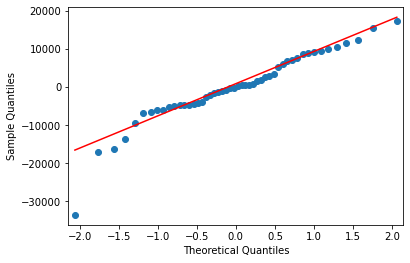

In [25]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line="q")
plt.show()

In [26]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # Important to find whether errors are normally ploted or not

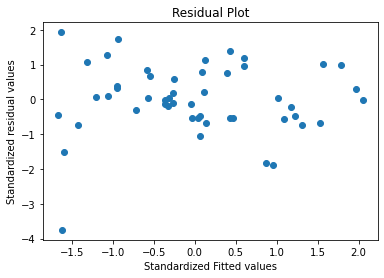

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [33]:
model_inf = model.get_influence()
(c,_)= model_inf.cooks_distance

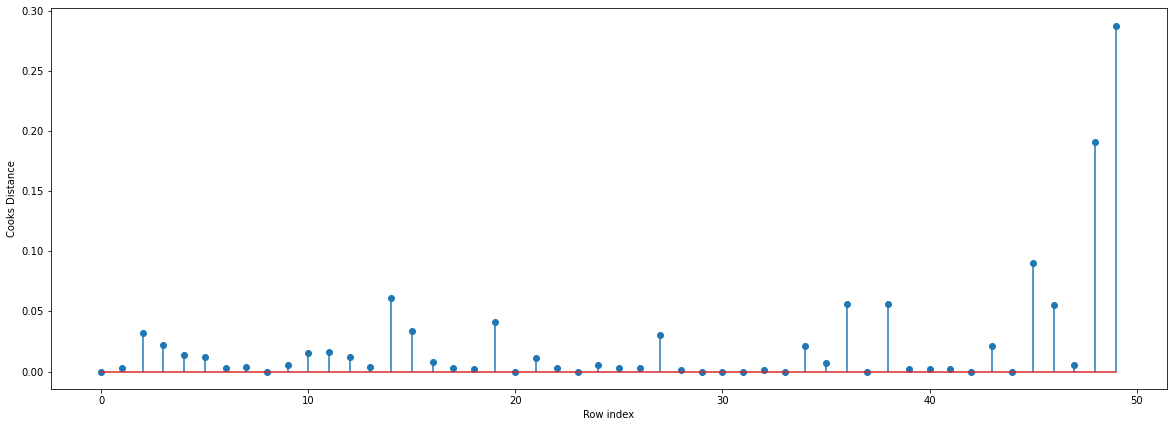

In [34]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()    

In [36]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432584)

In [37]:
df[df.index.isin([49])]

,RD,AD,MD,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [38]:
df.head()

,RD,AD,MD,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
df_new = df.drop(df.index[49], axis= 0).reset_index()
df_new1 = df_new.drop(["index"], axis = 1)
df_new1

,RD,AD,MD,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
final_1 = smf.ols("Profit~RD+AD+MD",data=df_new1).fit()

In [44]:
(final_1.rsquared,final_1.rsquared_adj)

(0.9613162435129847, 0.9587373264138503)

In [45]:
model_info1 = final_1.get_influence()
(c_v,_)= model_info1.cooks_distance

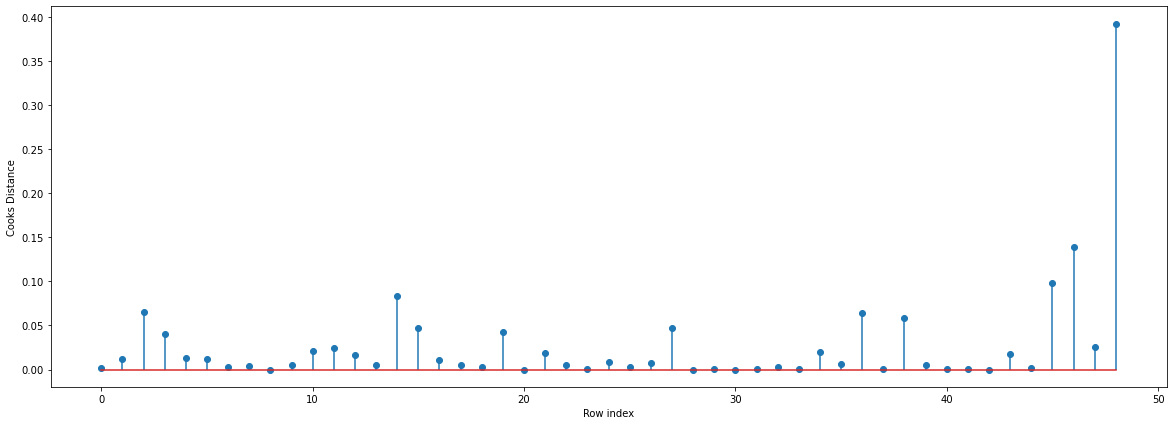

In [46]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new1)),np.round(c_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [47]:
(np.argmax(c_v),np.max(c_v))

(48, 0.39274420556321316)

In [53]:
df_new1[df_new1.index.isin([48])]
df[df.index.isin([48])]

,RD,AD,MD,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [55]:
df_new2 = df_new1.drop(df_new1.index[48] , axis= 0).reset_index()
df_new3 = df_new2.drop(["index"], axis=1)
df_new3

,RD,AD,MD,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [58]:
final_2 = smf.ols("Profit~RD+AD+MD",data=df_new3).fit()


In [60]:
(final_2.rsquared,final_2.rsquared_adj)

(0.9626766170294073, 0.960131840917776)

In [61]:
new_data=pd.DataFrame({"RD":123334,"AD":84710,"MD":81005},index=[1])
new_data

,RD,AD,MD
1,123334,84710,81005


In [62]:
final_2.predict(new_data)

1    152472.37367
dtype: float64

In [75]:
pre_org=final_2.predict(df_new3)


In [76]:
model_info2 = final_2.get_influence()
(c_V,_)= model_info2.cooks_distance

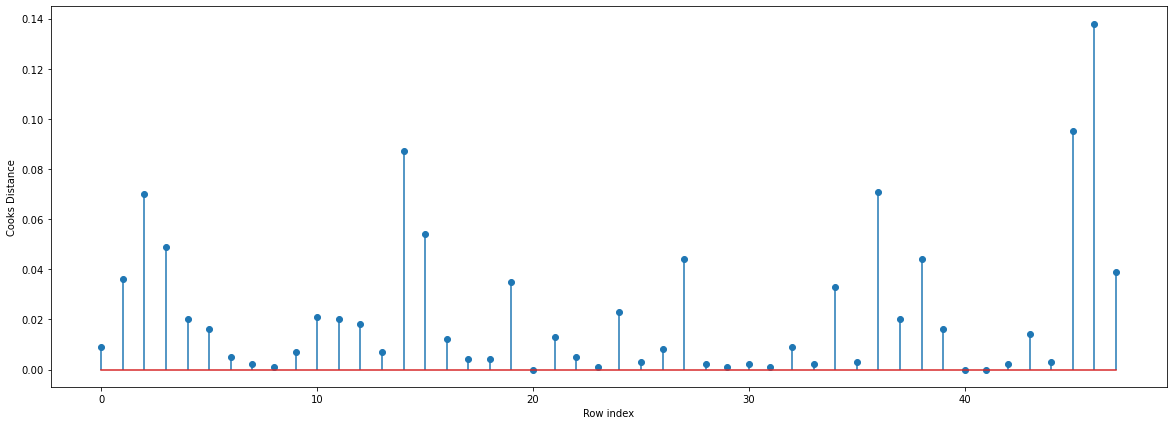

In [77]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [78]:
(np.argmax(c_V),np.max(c_V))

(46, 0.13829133994334386)

In [79]:
df_new4 = df_new3.drop(df_new1.index[46] , axis= 0).reset_index()
df_new5 = df_new4.drop(["index"], axis=1)
df_new5

,RD,AD,MD,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [80]:
final_3 = smf.ols("Profit~RD+AD+MD",data=df_new5).fit()

In [81]:
(final_3.rsquared,final_3.rsquared_adj)

(0.9614129113440602, 0.9587207888796923)

In [84]:
pre_org1=final_3.predict(df_new5)

In [85]:
Result = pd.DataFrame({"original":data,"predict":pre_org1})
Result

,original,predict
0,192261.83,189144.021141
1,191792.06,185571.505316
2,191050.39,180343.992254
3,182901.99,171860.489927
4,166187.94,171153.336127
5,156991.12,162804.123770
6,156122.51,156477.343357
7,155752.60,158187.870039
8,152211.77,150255.251593
9,149759.96,154352.656745


# R-Square value

In [90]:
R_sqr_tab = pd.DataFrame({"Original":model.rsquared,"modified_1":final_1.rsquared, 
                          "modified_2":final_2.rsquared,
                          "Final":final_3.rsquared},index=[1])

In [91]:
R_sqr_tab

,Original,modified_1,modified_2,Final
1,0.950746,0.961316,0.962677,0.961413
